# Data Download , Unzip

In [ ]:
# COCO Dataset wget images ( train/val/test )
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/zips/test2017.zip

# COCO Dataset wget annotations ( train/val/test )
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget http://images.cocodataset.org/annotations/image_info_test2017.zip


In [1]:
!mkdir /content/data

In [ ]:
!unzip /content/annotations_trainval2017.zip -d /content/data

!unzip /content/test2017.zip -d /content/data
!unzip /content/train2017.zip -d /content/data
!unzip /content/val2017.zip -d /content/data

unzip:  cannot find or open /content/annotations_trainval2017.zip, /content/annotations_trainval2017.zip.zip or /content/annotations_trainval2017.zip.ZIP.
unzip:  cannot find or open /content/test2017.zip, /content/test2017.zip.zip or /content/test2017.zip.ZIP.
unzip:  cannot find or open /content/train2017.zip, /content/train2017.zip.zip or /content/train2017.zip.ZIP.
unzip:  cannot find or open /content/val2017.zip, /content/val2017.zip.zip or /content/val2017.zip.ZIP.


# Detectron2 Install

In [2]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 14474, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 14474 (delta 18), reused 32 (delta 13), pack-reused 14425
Receiving objects: 100% (14474/14474), 5.93 MiB | 13.51 MiB/s, done.
Resolving deltas: 100% (10463/10463), done.


In [3]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
#!pip install -U torch==1.8 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install -U torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html --quiet
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

     |█████████████▌                  | 834.1 MB 3.4 MB/s eta 0:05:41tcmalloc: large alloc 1147494400 bytes == 0x3a9ec000 @  0x7f239d517615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:13:13tcmalloc: large alloc 1434370048 bytes == 0x7f042000 @  0x7f239d517615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████▋          | 1336.2 MB 4.1 MB/s eta 0:02:37tcmalloc: large alloc 1792966656 bytes == 0x3e74000 @  0x7f239d517615 0x592b76 0x4df71e 0x59afff 0x515655 0x5

In [4]:
# install detectron2:
!pip install detectron2==0.6 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.8/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.8/index.html
     |████████████████████████████████| 6.8 MB 8.1 MB/s 
     |████████████████████████████████| 130 kB 4.1 MB/s 
     |████████████████████████████████| 106 kB 25.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 151 kB 59.1 MB/s 
     |████████████████████████████████| 843 kB 76.3 MB/s 
     |████████████████████████████████| 117 kB 73.9 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=b1c55e7476260a50a6716bfa33a8e8d66494bb9c707d3bff290d773e81dc8924
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0

# Detectron2 Model, Dataset Setting



In [5]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog
from detectron2.config import get_cfg
import random
from detectron2.utils.visualizer import Visualizer
import os

In [ ]:
# json 및 Image path setting
from detectron2.data.datasets import register_coco_instances

register_coco_instances("my_dataset_train", {}, "/content/data/annotations/instances_train2017.json", "/content/data/train2017")
register_coco_instances("my_dataset_val", {}, "/content/data/annotations/instances_val2017.json", "/content/data/val2017")
# register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")


In [ ]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

# Train

In [ ]:

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 500
cfg.SOLVER.MAX_ITER = 1000 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 80 
cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[07/22 04:38:33 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_2d9806.pkl: 431MB [00:14, 30.0MB/s]                           


[07/22 04:39:43 d2.engine.train_loop]: Starting training from iteration 0
[07/22 04:40:17 d2.utils.events]:  eta: 0:28:23  iter: 19  total_loss: 0.691  loss_cls: 0.159  loss_box_reg: 0.261  loss_mask: 0.213  loss_rpn_cls: 0.012  loss_rpn_loc: 0.035  time: 1.7053  data_time: 0.0634  lr: 0.000039  max_mem: 11692M
[07/22 04:40:51 d2.utils.events]:  eta: 0:27:32  iter: 39  total_loss: 0.711  loss_cls: 0.177  loss_box_reg: 0.271  loss_mask: 0.194  loss_rpn_cls: 0.013  loss_rpn_loc: 0.049  time: 1.7105  data_time: 0.0156  lr: 0.000079  max_mem: 11692M
[07/22 04:41:25 d2.utils.events]:  eta: 0:26:50  iter: 59  total_loss: 0.830  loss_cls: 0.168  loss_box_reg: 0.309  loss_mask: 0.202  loss_rpn_cls: 0.018  loss_rpn_loc: 0.059  time: 1.6955  data_time: 0.0171  lr: 0.000119  max_mem: 11692M
[07/22 04:42:00 d2.utils.events]:  eta: 0:26:33  iter: 79  total_loss: 0.639  loss_cls: 0.148  loss_box_reg: 0.251  loss_mask: 0.185  loss_rpn_cls: 0.012  loss_rpn_loc: 0.036  time: 1.7111  data_time: 0.0126  

# Inference Run

## Inpating setting

In [ ]:
# 깃허브 repository 가져오기
!git clone https://github.com/saic-mdal/lama.git

# 라이브러리 설치
!pip install -r lama/requirements.txt --quiet
!pip install wget --quiet
!pip install torchtext==0.9

# 경로이동
%cd /content/lama

# weight 다운로드
!curl -L $(yadisk-direct https://disk.yandex.ru/d/ouP6l8VJ0HpMZg) -o big-lama.zip
!unzip big-lama.zip

# 라이브러리 설치
!pip uninstall opencv-python-headless -y --quiet
!pip install opencv-python-headless==4.1.2.30 --quiet

# 라이브러리 호출
import base64, os
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt
import numpy as np
import wget
from shutil import copyfile
import shutil



canvas_html = """
<style>
.button {
  background-color: #4CAF50;
  border: none;
  color: white;
  padding: 15px 32px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
}
</style>
<canvas1 width=%d height=%d>
</canvas1>
<canvas width=%d height=%d>
</canvas>

<button class="button">Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

var canvas1 = document.querySelector('canvas1')
var ctx1 = canvas.getContext('2d')


ctx.strokeStyle = 'red';

var img = new Image();
img.src = "data:image/%s;charset=utf-8;base64,%s";
console.log(img)
img.onload = function() {
  ctx1.drawImage(img, 0, 0);
};
img.crossOrigin = 'Anonymous';

ctx.clearRect(0, 0, canvas.width, canvas.height);

ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}

canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}

var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

# 그림 그리는 함수 선언
def draw(imgm, filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, w,h, filename.split('.')[-1], imgm, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

Cloning into 'lama'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 340 (delta 11), reused 11 (delta 3), pack-reused 316
Receiving objects: 100% (340/340), 9.87 MiB | 8.76 MiB/s, done.
Resolving deltas: 100% (98/98), done.
     |████████████████████████████████| 12.5 MB 4.2 MB/s 
     |████████████████████████████████| 22.3 MB 43.0 MB/s 
     |████████████████████████████████| 72 kB 855 kB/s 
     |████████████████████████████████| 144 kB 95.2 MB/s 
     |████████████████████████████████| 841 kB 66.8 MB/s 
     |████████████████████████████████| 271 kB 99.4 MB/s 
     |████████████████████████████████| 46 kB 4.9 MB/s 
     |████████████████████████████████| 48.3 MB 1.4 MB/s 
     |████████████████████████████████| 948 kB 66.2 MB/s 
     |████████████████████████████████| 74 kB 3.9 MB/s 
     |████████████████████████████████| 112 kB 70.3 MB/s 
     |████████████████████████████████| 

## pretrain weight down (detectron2)

In [ ]:
# https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md
%cd /content
!wget https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl

## Inference cfg

In [ ]:
!mkdir /content/data/test2017
!mkdir /content/data/output

In [ ]:
cfg = get_cfg()
cfg.OUTPUT_DIR = '/content/data/output/'

cfg.merge_from_file("/content/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "/content/model_final_2d9806.pkl"

cfg.DATASETS.TEST = ("my_dataset_test", )

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")


## cropper

In [11]:
# def cropper(org_image_path, mask_array, out_file_name):
#     num_instances = mask_array.shape[0]
#     mask_array = np.moveaxis(mask_array, 0, -1)
#     mask_array_instance = []
#     img = imread(str(org_image_path))
#     output = np.zeros_like(img)
#     for i in range(num_instances):
#         # a = mask_array[:, :, i:(i+1)]
#         mask_array_instance.append(mask_array[:, :, i:(i+1)])
#         output = np.where(mask_array_instance[i] == True, 255, output)

#     im = Image.fromarray(output)
#     im.save(out_file_name)


import cropper

In [10]:
%cd /content/detectron2

/content/detectron2


# Detector Segmentation

In [ ]:
!mkdir /content/lama/data_for_prediction

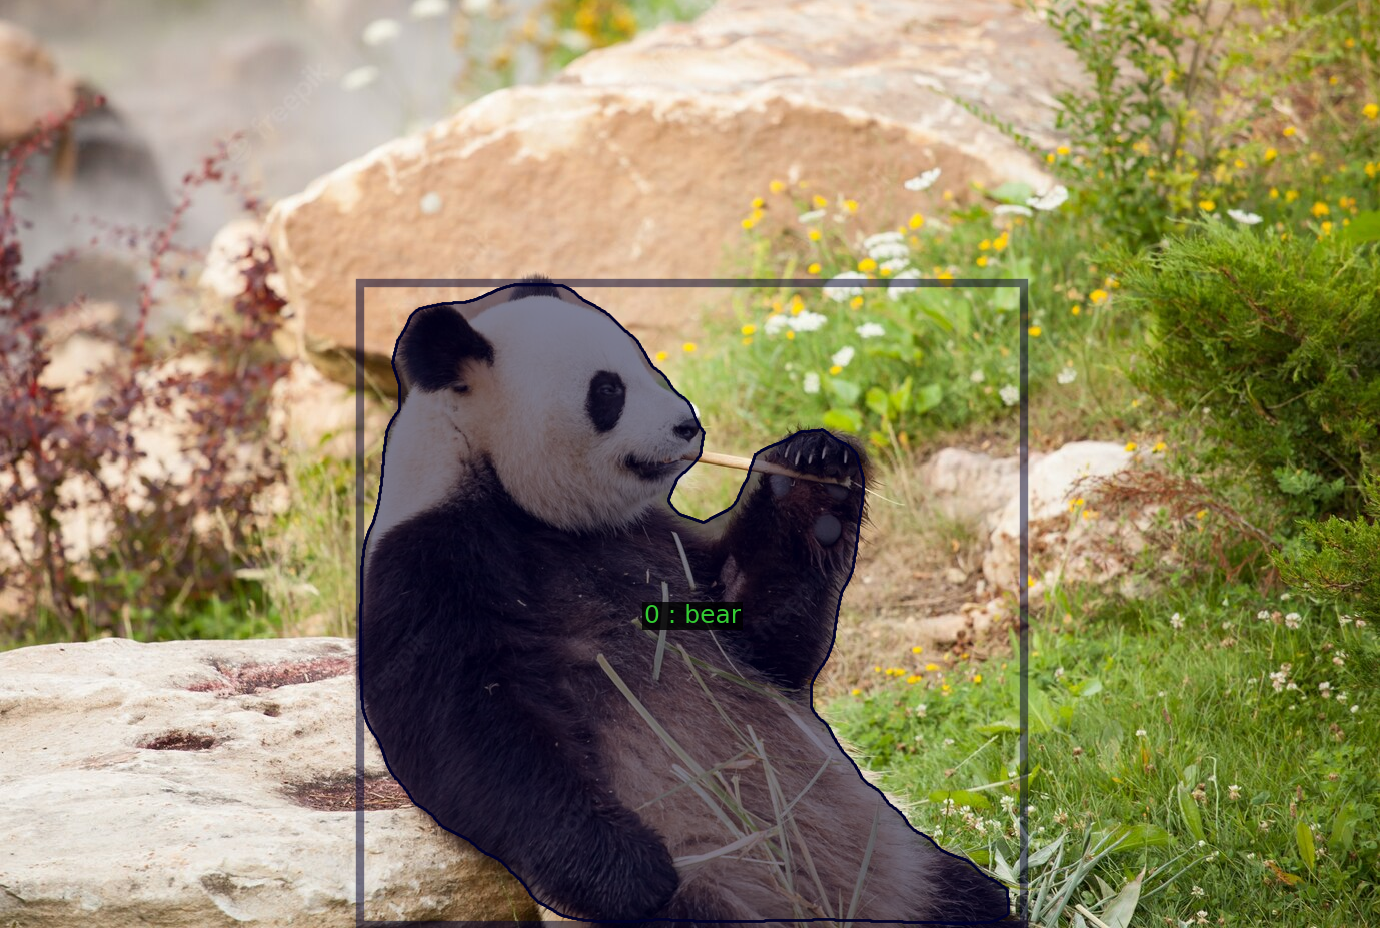

1 : 내가 원하는 물체 골라서 지우기
2 : 내가 원하는 물체만 남기고 나머지 다 지우기
3 : 내가 원하는 물체 종류를 한번에 지우기
4 : 내가 원하는 물체 종류를 남기고 나머지 다 지우기
원하는 업무의 번호 하나만 입력하세요(숫자만). : 1

지우고 싶은 물체 번호를 띄어쓰기로 구분해 입력해주세요 : 0
4.jpg의 이미지 작업이 완료되었습니다.(원본, Mask 이미지 작업)


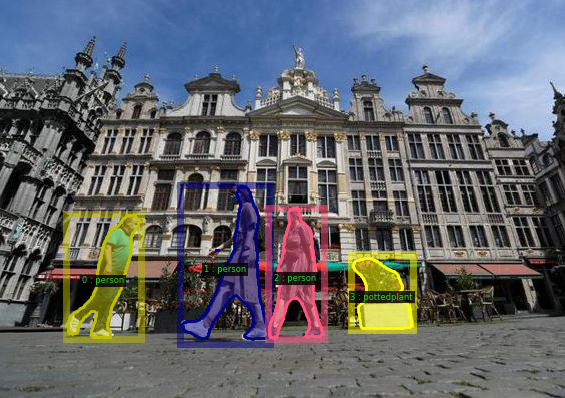

1 : 내가 원하는 물체 골라서 지우기
2 : 내가 원하는 물체만 남기고 나머지 다 지우기
3 : 내가 원하는 물체 종류를 한번에 지우기
4 : 내가 원하는 물체 종류를 남기고 나머지 다 지우기
원하는 업무의 번호 하나만 입력하세요(숫자만). : 3
------선택지-------
0 : person
58 : pottedplant
-------------------

지우고 싶은 물체 종류의 번호를 띄어쓰기로 구분해 입력해주세요 
공백 또는 입력하신 값이 없습니다. 다시 입력해주세요. : 0


2.jpg의 이미지 작업이 완료되었습니다.(원본, Mask 이미지 작업)


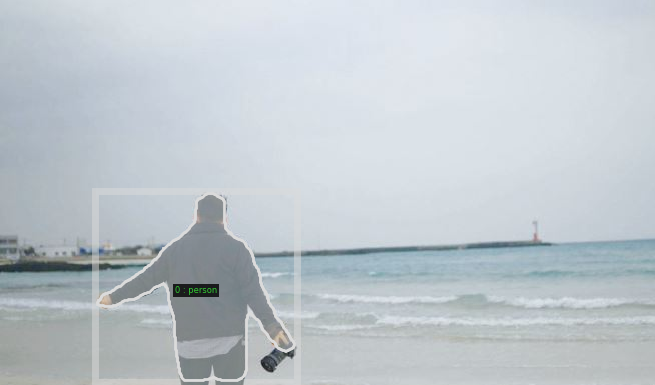

1 : 내가 원하는 물체 골라서 지우기
2 : 내가 원하는 물체만 남기고 나머지 다 지우기
3 : 내가 원하는 물체 종류를 한번에 지우기
4 : 내가 원하는 물체 종류를 남기고 나머지 다 지우기
원하는 업무의 번호 하나만 입력하세요(숫자만). : 2

남기고 싶은 물체 번호를 띄어쓰기로 구분해 입력해주세요0

수정할 물체가 없습니다.


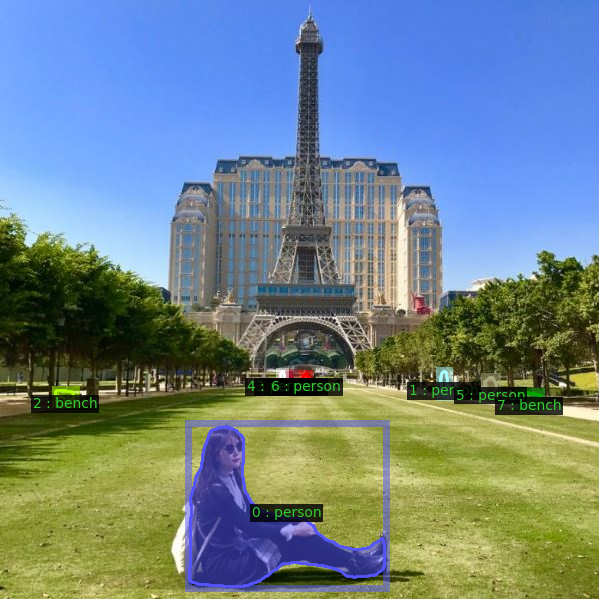

1 : 내가 원하는 물체 골라서 지우기
2 : 내가 원하는 물체만 남기고 나머지 다 지우기
3 : 내가 원하는 물체 종류를 한번에 지우기
4 : 내가 원하는 물체 종류를 남기고 나머지 다 지우기
원하는 업무의 번호 하나만 입력하세요(숫자만). : 4
------선택지-------
0 : person
13 : bench
-------------------

지우고 싶은 물체 종류의 번호를 띄어쓰기로 구분해 입력해주세요 0 13

수정할 물체가 없습니다.


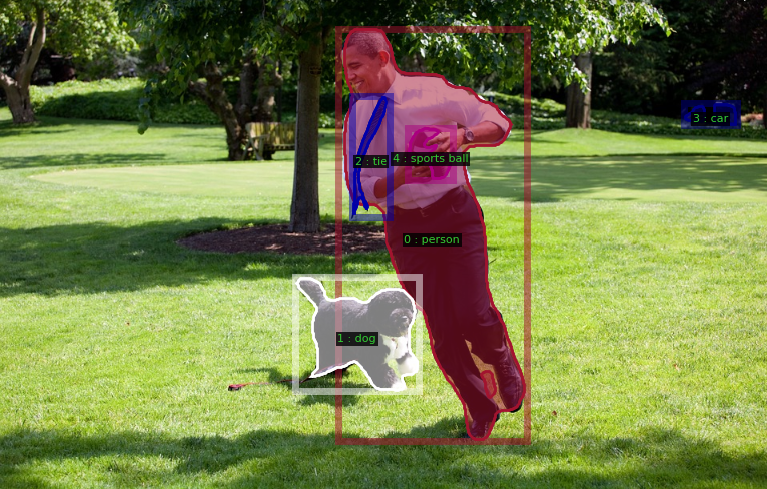

1 : 내가 원하는 물체 골라서 지우기
2 : 내가 원하는 물체만 남기고 나머지 다 지우기
3 : 내가 원하는 물체 종류를 한번에 지우기
4 : 내가 원하는 물체 종류를 남기고 나머지 다 지우기


KeyboardInterrupt: ignored

In [ ]:
import cropper
import inspectors


img_list = os.listdir('/content/data/test2017/')

for imageName in img_list:
    im = cv2.imread('/content/data/test2017/' + imageName)
    
    h, w, _ = im.shape

    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=1,
                # instance_mode=ColorMode.IMAGE_BW # 굳이 필욘 없네 # remove the colors of unsegmented pixels. This option is only available for segmentation models
                    )

    idxofClass = [i for i, x in enumerate(list(outputs['instances'].pred_classes))] #if x == 0]

    o = outputs["instances"]
    
    boxes = o.pred_boxes[idxofClass]
    masks = o.pred_masks[idxofClass]

    obj = detectron2.structures.instances.Instances(image_size=()) #w,h인지 h,w인지 모름


    obj.set('pred_boxes', boxes)
    obj.set('pred_masks', masks)


    out = v.draw_instance_predictions(obj.to("cpu"))

    boxes = v._convert_boxes(outputs["instances"].pred_boxes.to('cpu'))#.squeeze()

    for idx, box in enumerate(boxes):
        pred_class_num = outputs['instances'][idx].pred_classes.tolist()[0]
        class_text = coco_dic[str(pred_class_num)]
        out = v.draw_text(f"{idx} : {class_text}", ((box[0]+box[2])/2, (box[1]+box[3])/2), font_size = h//100, color = 'g') # 0번부터 아니고 1번부터 시작으로 할 수 있을 듯 (사용자 편의)

    cv2_imshow(out.get_image()[:, :, ::-1])

    # 사진이 print되는데 시간이 걸려서 대기시간 줌
    time.sleep(3)

#############

    mask = outputs['instances'].pred_masks
   
    print('1 : 내가 원하는 물체 골라서 지우기')
    print('2 : 내가 원하는 물체만 남기고 나머지 다 지우기')
    print('3 : 내가 원하는 물체 종류를 한번에 지우기')
    print('4 : 내가 원하는 물체 종류를 남기고 나머지 다 지우기')

    while 1234 :
        cate = input('원하는 업무의 번호 하나만 입력하세요(숫자만). : ')
        if len(cate) != 1 :
            print('')
            cate = input('원하는 업무의 번호를 하나만 입력해주세요(숫자만). : ')

        elif cate == '1' or cate == '2' or cate == '3' or cate == '4' :
          cate = int(cate)
          break
 
    # while 1 :
    #     if cate == 1 or cate == 2 or cate == 3 or cate == 4 :
    #         break
    #     else :
    #         print('입력 오류입니다.')
    #         print('숫자만 입력해주세요')
    #         cate = int(input('원하는 업무의 번호만 다시 입력하세요. : '))
        
    if cate == 1  :

        print('')
        select = input('지우고 싶은 물체 번호를 띄어쓰기로 구분해 입력해주세요 : ')

        select = inspector(select)

        if len(select) == 0 :
            print('수정할 물체가 없습니다.')
            continue


        tensor_list = []
    

        for a in select :
            tensor_list.append(mask[a])                           # 만약 idx+1 하면 select값에서 1을 빼야함
            
        tensor_stack = torch.stack(tensor_list)


        img_root = '/content/data/test2017/'
        img_path = img_root + imageName
        out_root = '/content/data/output/'
        out_path = out_root + imageName

        mask_array = tensor_stack.cpu().numpy()
        cropper(img_path, mask_array, out_path)

        shutil.copy(img_path, '/content/lama/data_for_prediction/'+imageName.split('.')[0]+'.jpg')
        # for dilate
        mask = cv2.imread(out_path)
        size = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10)) # (10, 10) 클 수록 팽창 범위 증가
        dilate_img = cv2.dilate(mask, size)
        
        cv2.imwrite('/content/lama/data_for_prediction/'+imageName.split('.')[0] +'_mask.png', dilate_img)
    

    elif cate == 2  :
        ### 오류이려나
        tensor_full_list = [x for x in range(len(boxes))]

        print('')
        select = input('남기고 싶은 물체 번호를 띄어쓰기로 구분해 입력해주세요')

        select = inspector(select)

        if len(select) == 0 :
            print('수정할 물체가 없습니다.')
            continue


        print('')

        select = list(set(tensor_full_list) - set(select))
        
        if len(select) == 0 :
            print('수정할 물체가 없습니다.')
            continue
        print('')

        tensor_list = []

        for a in select :
            tensor_list.append(mask[a])                           # 만약 idx+1 하면 select값에서 1을 빼야함
            
        tensor_stack = torch.stack(tensor_list)


        img_root = '/content/data/test2017/'
        img_path = img_root + imageName
        out_root = '/content/data/output/'
        out_path = out_root + imageName

        mask_array = tensor_stack.cpu().numpy()
        cropper(img_path, mask_array, out_path)

        shutil.copy(img_path, '/content/lama/data_for_prediction/'+imageName.split('.')[0]+'.jpg')
        # for dilate
        mask = cv2.imread(out_path)
        size = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10)) # (10, 10) 클 수록 팽창 범위 증가
        dilate_img = cv2.dilate(mask, size)
        
        cv2.imwrite('/content/lama/data_for_prediction/'+imageName.split('.')[0] +'_mask.png', dilate_img)


    elif cate == 3  :

        class_cate = outputs['instances'].to('cpu').pred_classes.tolist()
        class_cate = list(set(class_cate))

        print('------선택지-------')
        for c in class_cate :
            print(f'{c} : {coco_dic[str(c)]}')
        
        print('-------------------')
        print('')

        select = input('지우고 싶은 물체 종류의 번호를 띄어쓰기로 구분해 입력해주세요 ')

        select = inspector_class(select)

        print('')
        if len(select) == 0 :
            print('수정할 물체가 없습니다.')
            continue
        print('')



        tensor_list = []

        for idx in range(len(outputs['instances'])) :
            if outputs['instances'][idx].pred_classes.tolist()[0] in class_cate :
                tensor_list.append(mask[idx])
            
        tensor_stack = torch.stack(tensor_list)

        img_root = '/content/data/test2017/'
        img_path = img_root + imageName
        out_root = '/content/data/output/'
        out_path = out_root + imageName

        mask_array = tensor_stack.cpu().numpy()
        cropper(img_path, mask_array, out_path)

        shutil.copy(img_path, '/content/lama/data_for_prediction/'+imageName.split('.')[0]+'.jpg')
        # for dilate
        mask = cv2.imread(out_path)
        size = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10)) # (10, 10) 클 수록 팽창 범위 증가
        dilate_img = cv2.dilate(mask, size)
        
        cv2.imwrite('/content/lama/data_for_prediction/'+imageName.split('.')[0] +'_mask.png', dilate_img)




    elif cate == 4  :

        class_cate = outputs['instances'].to('cpu').pred_classes.tolist()
        class_cate = list(set(class_cate))

        print('------선택지-------')
        for c in class_cate :
            print(f'{c} : {coco_dic[str(c)]}')
        
        print('-------------------')
        print('')

        select = input('지우고 싶은 물체 종류의 번호를 띄어쓰기로 구분해 입력해주세요 ')

        select = inspector_class(select)

        print('')  

        select = list(set(class_cate) - set(select))

        if len(select) == 0 :
            print('수정할 물체가 없습니다.')
            continue

        tensor_list = []

        for idx in range(len(outputs['instances'])) :
            if outputs['instances'][idx].pred_classes.tolist()[0] in class_cate :
                tensor_list.append(mask[idx])
            
        tensor_stack = torch.stack(tensor_list)

        img_root = '/content/data/test2017/'
        img_path = img_root + imageName
        out_root = '/content/data/output/'
        out_path = out_root + imageName

        mask_array = tensor_stack.cpu().numpy()
        cropper(img_path, mask_array, out_path)

        shutil.copy(img_path, '/content/lama/data_for_prediction/'+imageName.split('.')[0]+'.jpg')
        # for dilate
        mask = cv2.imread(out_path)
        size = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10)) # (10, 10) 클 수록 팽창 범위 증가
        dilate_img = cv2.dilate(mask, size)
        
        cv2.imwrite('/content/lama/data_for_prediction/'+imageName.split('.')[0] +'_mask.png', dilate_img)
        
    print(imageName.split('.')[0] + '.jpg의 이미지 작업이 완료되었습니다.(원본, Mask 이미지 작업)')


# Inpainting Run

In [ ]:
%cd /content/lama

/content/lama


In [ ]:
!pwd

/content/lama


100% 2/2 [00:00<00:00,  3.46it/s]


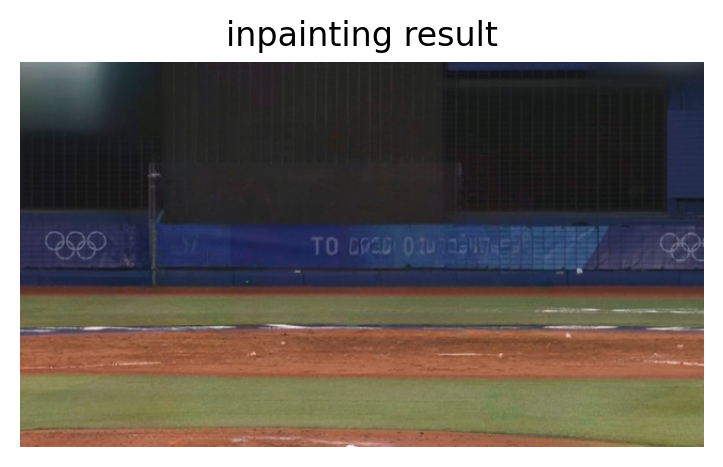

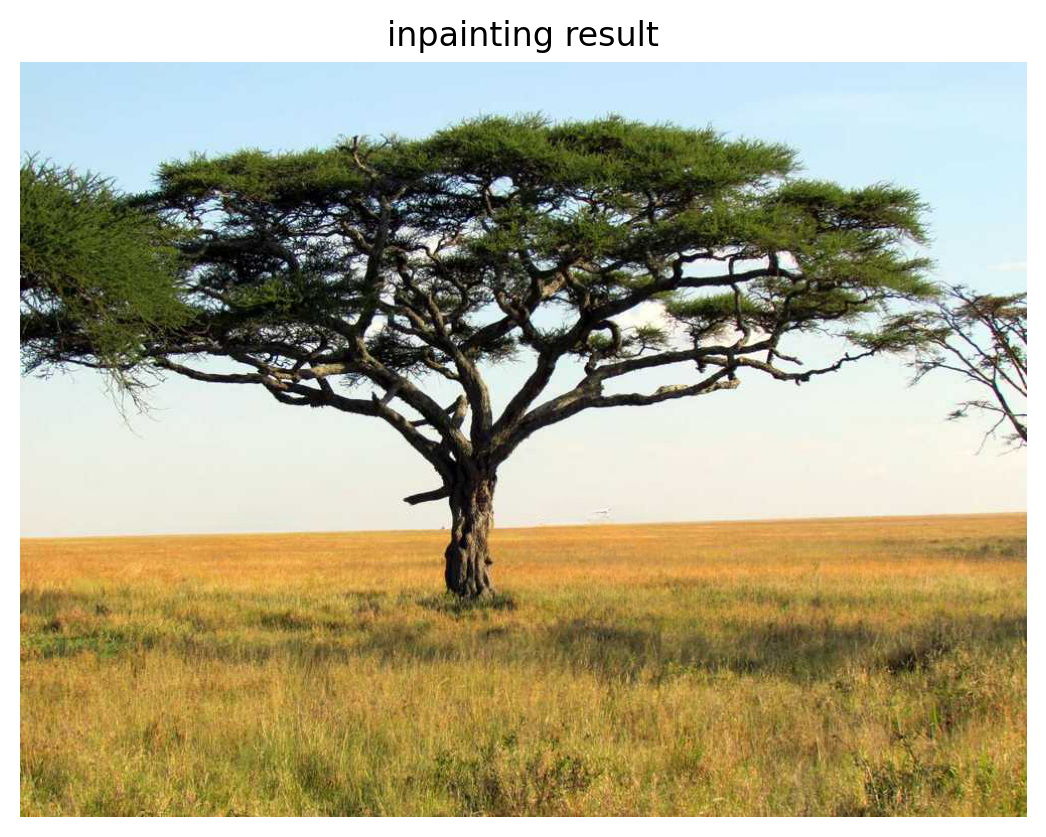

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['figure.dpi'] = 200
plt.subplot(131)

!PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output dataset.img_suffix=.jpg > /dev/null


for a in os.listdir('/content/output') :
  # 출력데이터도 png
  plt.imshow(plt.imread(f"/content/output/"+a))
  _=plt.axis('off')
  _=plt.title('inpainting result')
  plt.show()
  fname = None